파동 방정식은 주피터 노트북(ipynb)에서 수치 방법을 사용하여 모델링할 수 있습니다. 이를 위한 한 가지 방법은 파동 방정식을 이산화하고 유한한 차이를 사용하여 미분을 근사화하는 것이다. 파동 방정식을 푸는 일반적인 수치 방법은 유한 차분 방법이다. 다음은 코드에서 파동 방정식 계산을 구현하는 방법의 예입니다:

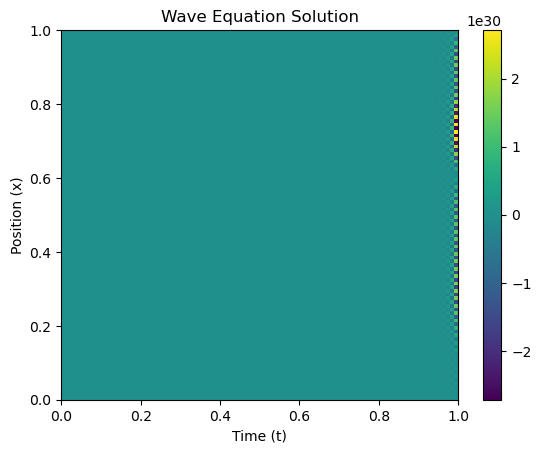

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def wave_equation(c, L, T, Nx, Nt):
    dx = L / (Nx - 1)
    dt = T / (Nt - 1)
    x = np.linspace(0, L, Nx)
    t = np.linspace(0, T, Nt)

    u = np.zeros((Nx, Nt))
    u[:, 0] = np.sin(np.pi * x)
    
    for n in range(1, Nt):
        for i in range(1, Nx-1):
            u[i, n] = u[i, n-1] + c**2 * dt**2 / dx**2 * (u[i+1, n-1] - 2 * u[i, n-1] + u[i-1, n-1])

    return x, t, u

L = 1
T = 1
c = 1
Nx = 100
Nt = 100
x, t, u = wave_equation(c, L, T, Nx, Nt)

plt.imshow(u, extent=[0, T, 0, L], origin='lower', aspect='auto')
plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.title('Wave Equation Solution')
plt.colorbar()
plt.show()

코드는 시공간 점의 그리드를 사용하여 파동 방정식을 해결하기 위해 유한 차분 방법을 구현한다. wave_equation 함수는 각각 파동 속도, 길이, 총 시간, 공간 점 수, 시점 수를 나타내는 매개 변수 c, L, T, Nt를 사용합니다. 공간, 시간 및 파동 방정식 솔루션을 각각 나타내는 배열 x, t, u를 반환합니다. 솔루션은 matplotlib 라이브러리의 imshow 함수를 사용하여 시각화됩니다.

In [3]:
!pip install SciPy

유도를 이용한 파동방정식은 유한차나 유한요소와 같은 수치적 방법을 이용하여 풀 수 있다. SciPy를 이용하여 유도로 파동방정식을 풀려면 유한차분법과 같은 수치해법을 구현하고 SciPy 라이브러리를 이용하여 방정식을 풀고 결과를 시각화하면 된다

In [4]:
import numpy as np
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

def wave_equation_induction_solver(c, L, T, Nx, Nt, I, V, f):
    x = np.linspace(0, L, Nx+1)
    t = np.linspace(0, T, Nt+1)
    dx = x[1] - x[0]
    dt = t[1] - t[0]
    alpha = c**2 * dt**2 / dx**2

    A = diags([-alpha/2, 1 + alpha, -alpha/2], [-1, 0, 1], shape=(Nx-1, Nx-1))
    u = np.zeros((Nx+1, Nt+1))
    u[:,0] = I(x)
    u[0,:] = V(t)
    u[-1,:] = V(t)

    for n in range(0, Nt):
        b = u[1:-1,n] + alpha/2 * (u[:-2,n] - 2*u[1:-1,n] + u[2:,n]) + dt * f(x[1:-1], t[n])
        u[1:-1,n+1] = spsolve(A, b)

    return x, t, u

이 코드는 NumPy의 linspace 함수를 사용하여 각각 x와 t의 이산화된 공간과 시간의 배열을 만든다. scipy.sparse 라이브러리의 diags 함수는 공간 미분의 유한 차이 근사치를 나타내는 삼각 행렬 A를 만드는 데 사용됩니다. scipy.sparse.linalg 라이브러리의 spolve 함수는 각 시간 단계에서 A와 b로 표현되는 선형 시스템을 푸는 데 사용된다.

초기 조건 I, 경계 조건 V 및 강제 조건 f에 대한 함수를 정의하고 이를 wave_equation_induction_solver 함수에 인수로 전달하여 이 솔버를 사용할 수 있습니다.